In [1]:
#Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


file = "WA Police Force Crime Timeseries.xlsx"
WAstats = pd.read_excel(file,sheet_name = "Data")

WAstats.fillna(0, inplace = True)


In [2]:
#list of regions
regionlist = WAstats['Website Region'].unique()
regionlist

array(['Armadale District', 'Cannington District', 'Fremantle District',
       'Goldfields-Esperance District', 'Great Southern District',
       'Joondalup District', 'Kimberley District', 'Mandurah District',
       'Metropolitan Region', 'Mid West-Gascoyne District',
       'Midland District', 'Mirrabooka District', 'Perth District',
       'Pilbara District', 'Regional WA Region', 'South West District',
       'Western Australia', 'Wheatbelt District'], dtype=object)

In [3]:
#list of crimes Lvl1
crimecatagories = WAstats[['WAPOL_Hierarchy_Lvl1','WAPOL_Hierarchy_Lvl2']].value_counts().reset_index()
crimecatagories.drop(columns=[0], inplace = True)
crimecatagories

,WAPOL_Hierarchy_Lvl1,WAPOL_Hierarchy_Lvl2
0,Threatening Behaviour (Non-Family),Threatening Behaviour (Non-Family)
1,Cultivate or Manufacture Drugs,Drug Offences
2,Kidnapping / Child Stealing,Deprivation of Liberty
3,Graffiti,Graffiti
4,Fraud (Not Elsewhere Classified),Fraud & Related Offences
5,Fraud (Credit Card),Fraud & Related Offences
6,Forgery,Fraud & Related Offences
7,Drug Possession,Drug Offences
8,Drug Dealing,Drug Offences
9,Driving Causing Death,Homicide


In [4]:
#list of crimes lvl2
basiccrimedesc = WAstats['WAPOL_Hierarchy_Lvl2'].unique()
basiccrimedesc

array(['Homicide', 'Recent Sexual Offences', 'Historical Sexual Offences',
       'Assault (Family)', 'Assault (Non-Family)',
       'Threatening Behaviour (Family)',
       'Threatening Behaviour (Non-Family)', 'Deprivation of Liberty',
       'Robbery', 'Burglary', 'Stealing of Motor Vehicle', 'Stealing',
       'Property Damage', 'Arson', 'Drug Offences',
       'Receiving and Possession of Stolen Property',
       'Regulated Weapons Offences', 'Graffiti',
       'Fraud & Related Offences', 'Breach of Violence Restraint Order'],
      dtype=object)

## Regional Data

In [5]:
#Regional DF
Regional_df = WAstats[WAstats["Website Region"]=="Regional WA Region"]
Regional_df.head()

,Website Region,WAPOL_Hierarchy_order_Lvl1,WAPOL_Hierarchy_Lvl1,WAPOL_Hierarchy_order_Lvl2,WAPOL_Hierarchy_Lvl2,Period,Year,Key,MonthYear,COUNT_of_Offnc_ID
117600,Regional WA Region,1.1,Murder,1,Homicide,2007-01-01,2006-07,Regional WA RegionMurderHomicide12007,12007,0.0
117601,Regional WA Region,1.1,Murder,1,Homicide,2007-02-01,2006-07,Regional WA RegionMurderHomicide22007,22007,0.0
117602,Regional WA Region,1.1,Murder,1,Homicide,2007-03-01,2006-07,Regional WA RegionMurderHomicide32007,32007,0.0
117603,Regional WA Region,1.1,Murder,1,Homicide,2007-04-01,2006-07,Regional WA RegionMurderHomicide42007,42007,2.0
117604,Regional WA Region,1.1,Murder,1,Homicide,2007-05-01,2006-07,Regional WA RegionMurderHomicide52007,52007,1.0


In [22]:
Plotting_df = Regional_df.groupby(['WAPOL_Hierarchy_Lvl2','Period'])['COUNT_of_Offnc_ID'].sum().reset_index()
Plotting_df = Plotting_df[Plotting_df["Period"]>dt.datetime(year=2019, month = 1, day = 1)]
Plotting_df['Period'] = Plotting_df['Period'].dt.strftime('%Y-%m')

In [23]:
Plotting = Plotting_df.pivot(index='Period', columns='WAPOL_Hierarchy_Lvl2', values='COUNT_of_Offnc_ID')
Plotting

WAPOL_Hierarchy_Lvl2,Arson,Assault (Family),Assault (Non-Family),Breach of Violence Restraint Order,Burglary,Deprivation of Liberty,Drug Offences,Fraud & Related Offences,Graffiti,Historical Sexual Offences,Homicide,Property Damage,Receiving and Possession of Stolen Property,Recent Sexual Offences,Regulated Weapons Offences,Robbery,Stealing,Stealing of Motor Vehicle,Threatening Behaviour (Family),Threatening Behaviour (Non-Family)
Period,,,,,,,,,,,,,,,,,,,,
2019-02,31.0,602.0,287.0,447.0,607.0,10.0,890.0,215.0,30.0,38.0,1.0,724.0,77.0,74.0,108.0,14.0,1151.0,121.0,86.0,76.0
2019-03,35.0,759.0,326.0,408.0,904.0,2.0,861.0,322.0,37.0,29.0,2.0,765.0,97.0,99.0,134.0,15.0,1216.0,198.0,94.0,95.0
2019-04,25.0,679.0,238.0,315.0,768.0,5.0,780.0,199.0,26.0,47.0,4.0,696.0,58.0,57.0,95.0,20.0,1253.0,136.0,90.0,70.0
2019-05,22.0,629.0,257.0,288.0,657.0,7.0,804.0,267.0,35.0,54.0,2.0,730.0,88.0,117.0,121.0,12.0,1192.0,144.0,94.0,80.0
2019-06,25.0,554.0,214.0,294.0,609.0,2.0,730.0,235.0,29.0,50.0,2.0,612.0,93.0,61.0,89.0,9.0,971.0,101.0,73.0,40.0
2019-07,30.0,619.0,230.0,323.0,470.0,6.0,790.0,189.0,21.0,45.0,1.0,633.0,78.0,75.0,126.0,10.0,927.0,90.0,70.0,66.0
2019-08,20.0,653.0,284.0,326.0,578.0,6.0,911.0,190.0,26.0,53.0,5.0,629.0,90.0,80.0,165.0,13.0,1014.0,87.0,121.0,70.0
2019-09,25.0,620.0,291.0,281.0,631.0,3.0,898.0,137.0,34.0,31.0,2.0,687.0,70.0,98.0,99.0,14.0,1078.0,162.0,80.0,69.0
2019-10,42.0,665.0,271.0,381.0,771.0,2.0,659.0,286.0,31.0,62.0,4.0,815.0,61.0,95.0,75.0,23.0,1115.0,139.0,95.0,59.0


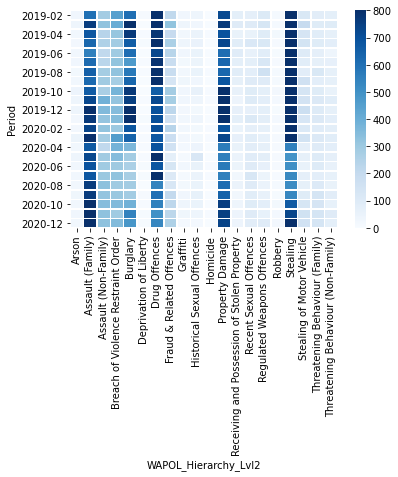

In [8]:
ax = sns.heatmap(Plotting, linewidth=0.5,cmap="Blues", vmin= 0, vmax=800)
plt.show()

In [9]:
#key crimes
TopCrimes = Plotting_df.groupby('WAPOL_Hierarchy_Lvl2')["COUNT_of_Offnc_ID"].sum().sort_values(ascending = False)
keycrimes = TopCrimes[0:6].index.tolist()
keycrimes

['Stealing',
 'Assault (Family)',
 'Drug Offences',
 'Property Damage',
 'Burglary',
 'Breach of Violence Restraint Order']

In [10]:
keycrimes_df = Plotting_df[Plotting_df['WAPOL_Hierarchy_Lvl2'].isin(keycrimes)]
keycrimespivot = keycrimes_df.pivot(index='Period', columns='WAPOL_Hierarchy_Lvl2', values='COUNT_of_Offnc_ID')
keycrimespivot

WAPOL_Hierarchy_Lvl2,Assault (Family),Breach of Violence Restraint Order,Burglary,Drug Offences,Property Damage,Stealing
Period,,,,,,
2019-02,602.0,447.0,607.0,890.0,724.0,1151.0
2019-03,759.0,408.0,904.0,861.0,765.0,1216.0
2019-04,679.0,315.0,768.0,780.0,696.0,1253.0
2019-05,629.0,288.0,657.0,804.0,730.0,1192.0
2019-06,554.0,294.0,609.0,730.0,612.0,971.0
2019-07,619.0,323.0,470.0,790.0,633.0,927.0
2019-08,653.0,326.0,578.0,911.0,629.0,1014.0
2019-09,620.0,281.0,631.0,898.0,687.0,1078.0
2019-10,665.0,381.0,771.0,659.0,815.0,1115.0


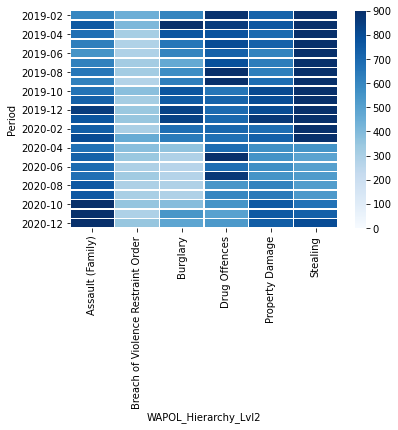

In [11]:
ax = sns.heatmap(keycrimespivot, linewidth=0.5,cmap="Blues", vmin= 0, vmax=900)
plt.show()

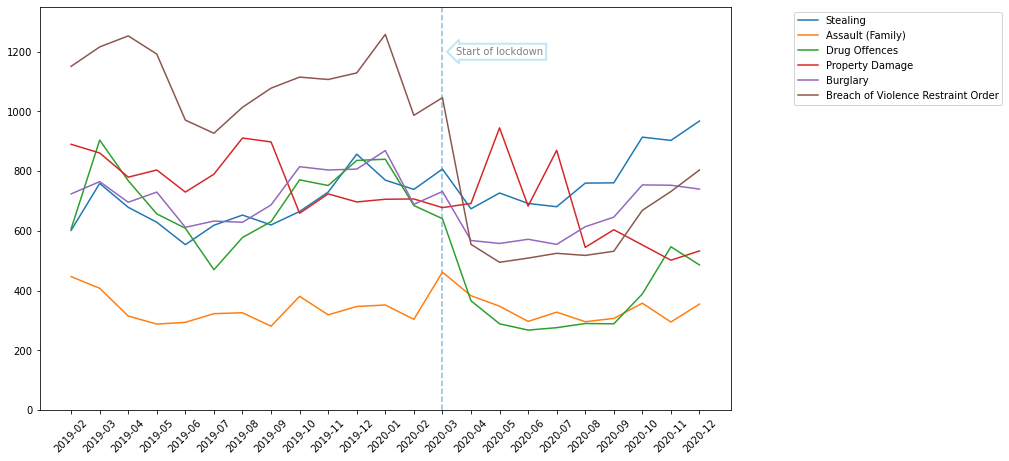

In [12]:
#line graph of key crimes 2019 to 2020
fig= plt.figure(figsize=(12,7))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

axes.plot(keycrimespivot)
t = axes.text(
    "2020-05", 1200, "Start of lockdown", alpha =0.5,ha="center", va="center", rotation=0, size=10,
    bbox=dict(boxstyle="larrow,pad=0.3", fc="white", ec="skyblue", alpha=0.5, lw=2))

#plt.annotate("Start of lockdown", ("2020-03",1200), fontsize = 12, color = "blue",alpha=0.5, arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='left', verticalalignment='top')
plt.vlines("2020-03",ymin = 0, ymax = 1400,linestyles='dashed', alpha=0.5)
plt.ylim(0,1350)
plt.xticks(rotation=45)
plt.legend(keycrimes,bbox_to_anchor = (1.4, 1.0))
plt.show()   

### Regional 2017-2021

In [103]:

y2017_df = Regional_df[Regional_df["Period"]>dt.datetime(year=2017, month = 1, day = 1)]
y2017_df['Year'] = y2017_df['Period'].dt.strftime('%Y')
yearly_df = y2017_df.groupby(['WAPOL_Hierarchy_Lvl2','Year'])['COUNT_of_Offnc_ID'].sum().reset_index()
yearly_df = yearly_df[yearly_df['WAPOL_Hierarchy_Lvl2'].isin(keycrimes)]

<ipython-input-103-5a9ddc2829e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y2017_df['Year'] = y2017_df['Period'].dt.strftime('%Y')


In [101]:
yearly_pivot = yearly_df.pivot(index='Year', columns='WAPOL_Hierarchy_Lvl2', values='COUNT_of_Offnc_ID')
yearly_pivot

WAPOL_Hierarchy_Lvl2,Assault (Family),Breach of Violence Restraint Order,Burglary,Drug Offences,Property Damage,Stealing
Year,,,,,,
2017,6609.0,3052.0,8105.0,9018.0,8912.0,13118.0
2018,7634.0,3770.0,8021.0,10609.0,8538.0,13228.0
2019,8058.0,4055.0,8357.0,9379.0,8696.0,13377.0
2020,9396.0,4085.0,5366.0,8018.0,8050.0,8630.0


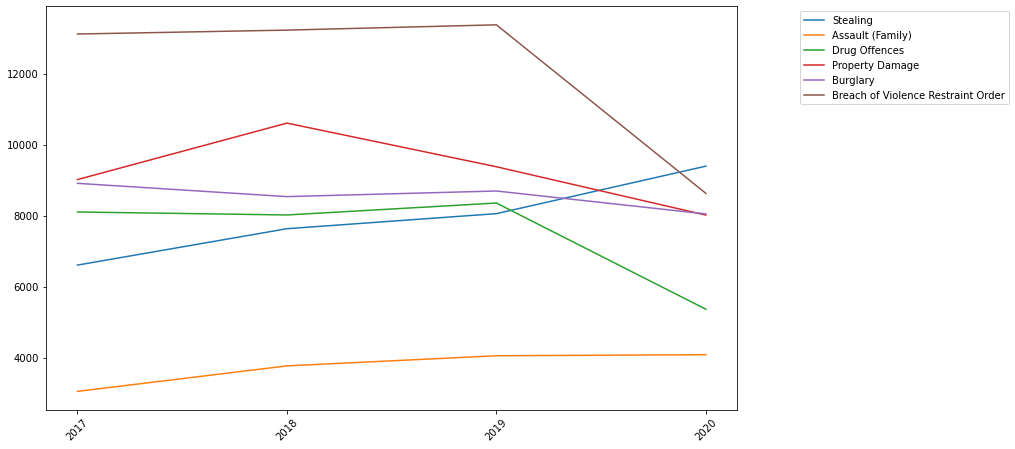

In [102]:
#line graph key crimes 
fig= plt.figure(figsize=(12,7))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

axes.plot(yearly_pivot)

plt.xticks(rotation=45)
plt.legend(keycrimes,bbox_to_anchor = (1.4, 1.0))
plt.show()   

In [104]:
yearly_pivot = yearly_pivot.reset_index().set_index('Year')
crimes = yearly_pivot.columns.tolist()
years = yearly_pivot.index.tolist()
crimes

['Assault (Family)',
 'Breach of Violence Restraint Order',
 'Burglary',
 'Drug Offences',
 'Property Damage',
 'Stealing']

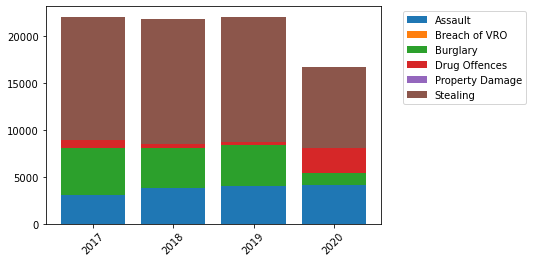

In [105]:

Assault = yearly_pivot[crimes[0]]
BreachofVRO = yearly_pivot[crimes[1]]
Burglary =yearly_pivot[crimes[2]]
Drug =yearly_pivot[crimes[3]]
PropertyDamage =yearly_pivot[crimes[4]]
Stealing = yearly_pivot[crimes[5]]

#plt.bar(crimes, yearly_pivot[crimes[1]] )
plt.bar(years, Assault, label = "Assault")
plt.bar(years,BreachofVRO,bottom=Assault, label = 'Breach of VRO')
plt.bar(years,Burglary,bottom=BreachofVRO, label = 'Burglary')
plt.bar(years,Drug,bottom=Burglary, label = 'Drug Offences')
plt.bar(years,PropertyDamage,bottom=Drug, label = 'Property Damage')
plt.bar(years,Stealing,bottom=PropertyDamage, label = 'Stealing')


plt.legend(bbox_to_anchor = (1.05, 1.0))
plt.xticks(rotation=45)
plt.show()     

In [106]:
mean = yearly_pivot.mean()
mean

WAPOL_Hierarchy_Lvl2
Assault (Family)                       7924.25
Breach of Violence Restraint Order     3740.50
Burglary                               7462.25
Drug Offences                          9256.00
Property Damage                        8549.00
Stealing                              12088.25
dtype: float64

<Figure size 864x504 with 0 Axes>

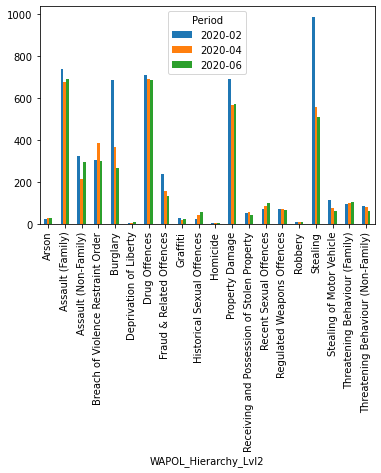

In [243]:
Lockdownperiods = Plotting2.loc[(Plotting2["Period"]=='2020-02')|(Plotting2["Period"]=='2020-04')|(Plotting2["Period"]=='2020-06')].set_index('Period')
fig= plt.figure(figsize=(12,7))
Transposed = Lockdownperiods.T
Transposed.plot.bar()
plt.show()


In [253]:
Transposed

Period,2020-02,2020-04,2020-06
WAPOL_Hierarchy_Lvl2,,,
Arson,24.0,27.0,26.0
Assault (Family),739.0,674.0,692.0
Assault (Non-Family),324.0,213.0,294.0
Breach of Violence Restraint Order,304.0,383.0,297.0
Burglary,685.0,366.0,268.0
Deprivation of Liberty,4.0,6.0,8.0
Drug Offences,707.0,692.0,683.0
Fraud & Related Offences,238.0,154.0,132.0
Graffiti,27.0,16.0,25.0


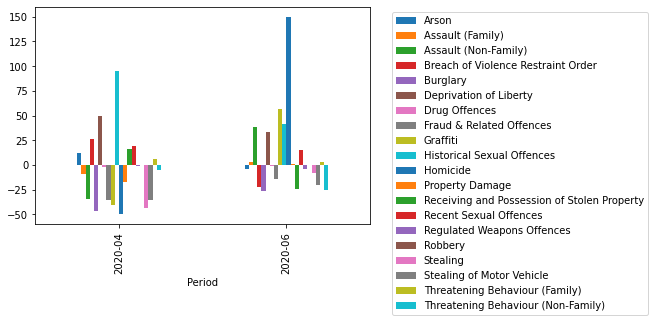

In [244]:

Change = Lockdownperiods.pct_change().multiply(100).round(2)
Change.dropna(axis='rows', inplace=True)
Change.plot(kind ='bar')
plt.legend(bbox_to_anchor = (1.05, 1.0))

<AxesSubplot:xlabel='WAPOL_Hierarchy_Lvl2'>

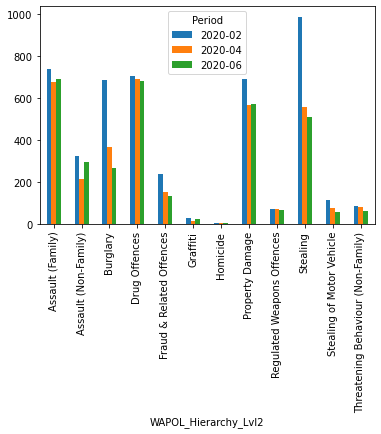

In [255]:
ChangeTransposed = Change.T
Crimesincoverlock = ChangeTransposed[ChangeTransposed["2020-04"]>0]
Crimesdecoverlock = ChangeTransposed[ChangeTransposed["2020-04"]<0]
Crimesdecoverlock.index
Transposed.loc[Crimesdecoverlock.index].plot.bar()


<AxesSubplot:xlabel='WAPOL_Hierarchy_Lvl2'>

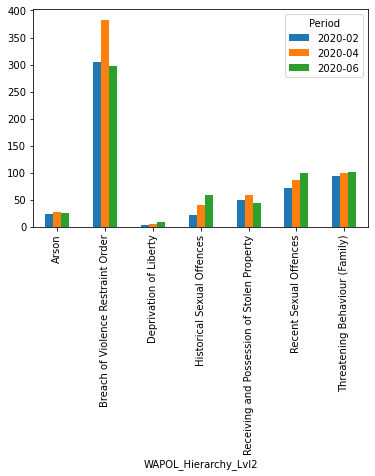

In [256]:
Transposed.loc[Crimesincoverlock.index].plot.bar()

In [178]:
for index in Change.index:
    print(Change.loc[index])

WAPOL_Hierarchy_Lvl2
Arson                                          12.50
Assault (Family)                               -8.80
Assault (Non-Family)                          -34.26
Breach of Violence Restraint Order             25.99
Burglary                                      -46.57
Deprivation of Liberty                         50.00
Drug Offences                                  -2.12
Fraud & Related Offences                      -35.29
Graffiti                                      -40.74
Historical Sexual Offences                     95.24
Homicide                                      -50.00
Property Damage                               -17.56
Receiving and Possession of Stolen Property    16.00
Recent Sexual Offences                         19.44
Regulated Weapons Offences                     -1.43
Robbery                                         0.00
Stealing                                      -43.77
Stealing of Motor Vehicle                     -35.09
Threatening Behaviour (Fa

In [84]:
Plotting2 = Plotting.reset_index()
prelockdown = Plotting2.loc[Plotting2["Period"]=='2020-02']
atlockdown = Plotting2.loc[Plotting2["Period"]=='2020-03']
postlockdown = Plotting2.loc[Plotting2["Period"]=='2020-06']

x = prelockdown - atlockdown
type(prelockdown)
Plotting2.set_index('Period').diff()

WAPOL_Hierarchy_Lvl2,Arson,Assault (Family),Assault (Non-Family),Breach of Violence Restraint Order,Burglary,Deprivation of Liberty,Drug Offences,Fraud & Related Offences,Graffiti,Historical Sexual Offences,Homicide,Property Damage,Receiving and Possession of Stolen Property,Recent Sexual Offences,Regulated Weapons Offences,Robbery,Stealing,Stealing of Motor Vehicle,Threatening Behaviour (Family),Threatening Behaviour (Non-Family)
Period,,,,,,,,,,,,,,,,,,,,
2019-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03,4.0,157.0,39.0,-39.0,297.0,-8.0,-29.0,107.0,7.0,-9.0,1.0,41.0,20.0,25.0,26.0,1.0,65.0,77.0,8.0,19.0
2019-04,-10.0,-80.0,-88.0,-93.0,-136.0,3.0,-81.0,-123.0,-11.0,18.0,2.0,-69.0,-39.0,-42.0,-39.0,5.0,37.0,-62.0,-4.0,-25.0
2019-05,-3.0,-50.0,19.0,-27.0,-111.0,2.0,24.0,68.0,9.0,7.0,-2.0,34.0,30.0,60.0,26.0,-8.0,-61.0,8.0,4.0,10.0
2019-06,3.0,-75.0,-43.0,6.0,-48.0,-5.0,-74.0,-32.0,-6.0,-4.0,0.0,-118.0,5.0,-56.0,-32.0,-3.0,-221.0,-43.0,-21.0,-40.0
2019-07,5.0,65.0,16.0,29.0,-139.0,4.0,60.0,-46.0,-8.0,-5.0,-1.0,21.0,-15.0,14.0,37.0,1.0,-44.0,-11.0,-3.0,26.0
2019-08,-10.0,34.0,54.0,3.0,108.0,0.0,121.0,1.0,5.0,8.0,4.0,-4.0,12.0,5.0,39.0,3.0,87.0,-3.0,51.0,4.0
2019-09,5.0,-33.0,7.0,-45.0,53.0,-3.0,-13.0,-53.0,8.0,-22.0,-3.0,58.0,-20.0,18.0,-66.0,1.0,64.0,75.0,-41.0,-1.0
2019-10,17.0,45.0,-20.0,100.0,140.0,-1.0,-239.0,149.0,-3.0,31.0,2.0,128.0,-9.0,-3.0,-24.0,9.0,37.0,-23.0,15.0,-10.0


In [91]:
prelockdown

WAPOL_Hierarchy_Lvl2,Period,Arson,Assault (Family),Assault (Non-Family),Breach of Violence Restraint Order,Burglary,Deprivation of Liberty,Drug Offences,Fraud & Related Offences,Graffiti,...,Homicide,Property Damage,Receiving and Possession of Stolen Property,Recent Sexual Offences,Regulated Weapons Offences,Robbery,Stealing,Stealing of Motor Vehicle,Threatening Behaviour (Family),Threatening Behaviour (Non-Family)
12,2020-02,24.0,739.0,324.0,304.0,685.0,4.0,707.0,238.0,27.0,...,4.0,689.0,50.0,72.0,70.0,10.0,987.0,114.0,93.0,84.0


In [71]:
lvl1group_df = Regional_df.groupby(['WAPOL_Hierarchy_Lvl1','Period'])['COUNT_of_Offnc_ID'].sum().reset_index()
lvl1group_df = lvl1group_df[lvl1group_df["Period"]>dt.datetime(year=2017, month = 1, day = 1)]
lvl1group_df['Period'] = lvl1group_df['Period'].dt.strftime('%Y-%m')

In [17]:

pivotlvl1 = lvl1group_df.pivot(index='Period', columns='WAPOL_Hierarchy_Lvl1', values='COUNT_of_Offnc_ID')
pivotlvl1

WAPOL_Hierarchy_Lvl1,Assault Police Officer,Attempted / Conspiracy to Murder,Breach of Family Violence Restraint Order,Breach of Police Order,Breach of Violence Restraint Order,Burglary (Dwelling),Burglary (Non-Dwelling),Cause Bushfire,Cause Damage by Fire,Common Assault (Family),...,Sexual Assault,Stealing (Not Elsewhere Classified),Stealing From Dwelling,Stealing From Motor Vehicle (Contents or Parts),Stealing From Other Premises or Place,Stealing From Retail Premises (Shoplift),Stealing as a Servant,Stealing of Motor Vehicle,Threatening Behaviour (Family),Threatening Behaviour (Non-Family)
Period,,,,,,,,,,,,,,,,,,,,,
2017-02,34.0,0.0,123.0,85.0,12.0,538.0,273.0,13.0,23.0,458.0,...,151.0,1315.0,0.0,0.0,0.0,0.0,6.0,156.0,55.0,32.0
2017-03,37.0,1.0,269.0,110.0,24.0,525.0,262.0,13.0,19.0,471.0,...,131.0,1314.0,0.0,0.0,0.0,0.0,4.0,143.0,87.0,60.0
2017-04,30.0,0.0,158.0,85.0,18.0,421.0,228.0,7.0,29.0,465.0,...,70.0,1122.0,0.0,0.0,0.0,0.0,6.0,113.0,47.0,26.0
2017-05,40.0,0.0,131.0,90.0,20.0,475.0,168.0,5.0,21.0,389.0,...,112.0,1416.0,0.0,0.0,0.0,0.0,3.0,94.0,47.0,29.0
2017-06,38.0,0.0,112.0,72.0,36.0,530.0,216.0,1.0,23.0,430.0,...,65.0,221.0,266.0,211.0,395.0,127.0,4.0,118.0,43.0,29.0
2017-07,36.0,0.0,139.0,90.0,34.0,421.0,209.0,0.0,22.0,412.0,...,140.0,0.0,252.0,259.0,352.0,178.0,10.0,157.0,53.0,29.0
2017-08,29.0,0.0,175.0,93.0,23.0,551.0,185.0,4.0,26.0,421.0,...,129.0,0.0,266.0,311.0,362.0,201.0,11.0,148.0,65.0,35.0
2017-09,35.0,0.0,172.0,123.0,17.0,506.0,197.0,4.0,25.0,456.0,...,120.0,0.0,241.0,281.0,358.0,197.0,13.0,148.0,66.0,26.0
2017-10,22.0,0.0,204.0,85.0,12.0,601.0,230.0,5.0,24.0,529.0,...,83.0,0.0,293.0,309.0,378.0,195.0,5.0,158.0,63.0,28.0


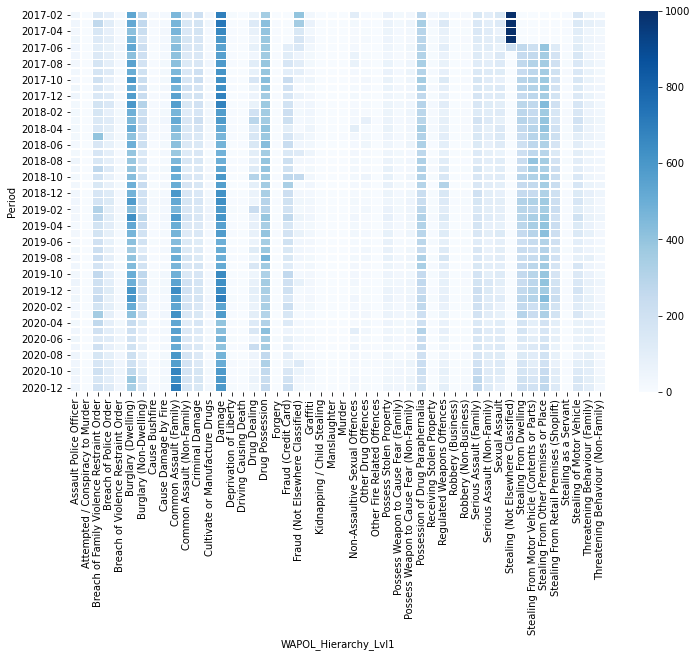

In [18]:
fig= plt.figure(figsize=(12,7))
ax = sns.heatmap(pivotlvl1, linewidth=0.5,cmap="Blues", vmin= 0, vmax=1000)
plt.show()

In [19]:
plt.bar(Plotting)

TypeError: bar() missing 1 required positional argument: 'height'

IndexError: index 10 is out of bounds for axis 0 with size 10

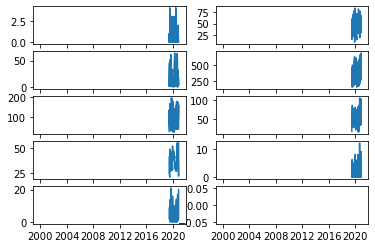

In [13]:
a = 0
fig, axs = plt.subplots(5,2, sharex=True, sharey=False)
axs = axs.ravel()

for crime in basiccrimedesc:
    x = plot_df[plot_df["WAPOL_Hierarchy_Lvl2"]==crime]['Period']
    y = plot_df[plot_df["WAPOL_Hierarchy_Lvl2"]==crime]['COUNT_of_Offnc_ID']   
    axs[a].plot(x,y)
    a += 1
plt.figure(figsize=(20,12))
plt.savefig("Crime.png")
 
plt.show()        




,Period,COUNT_of_Offnc_ID
WAPOL_Hierarchy_Lvl2,,
Homicide,2019-07-01,0.0
Deprivation of Liberty,2019-07-01,6.0
Homicide,2019-07-01,1.0
Deprivation of Liberty,2019-07-01,0.0
Recent Sexual Offences,2019-07-01,60.0
...,...,...
Homicide,2020-12-01,0.0
Deprivation of Liberty,2020-12-01,0.0
Homicide,2020-12-01,0.0


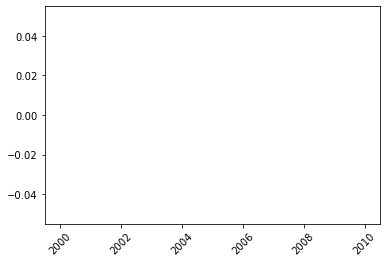

In [ ]:
for crime in keycrimes:
    x = plot_df[plot_df["WAPOL_Hierarchy_Lvl2"]==crime]['Period']
    y = plot_df[plot_df["WAPOL_Hierarchy_Lvl2"]==crime]['COUNT_of_Offnc_ID']  
    plt.scatter(x,y, label=crime)
plt.legend(bbox_to_anchor = (1.05, 1.0))
plt.xticks(rotation=45)
plt.show()     

## Metro Data

## Total WA Data